# Plotting lattice quantities
The chip lab uses (used) a 760.6nm blue-detuned lattice for the potassium-40 degenerate Fermi gas.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar

from general.plot_settings import paper_settings
plt.rcParams.update(paper_settings)

## Plot band energies

In [9]:
s = 4  # In recoil energy
Lat = Lattice(s)

print(f"The recoil energy is {Lat.ER/h/1e3:.2f} kHz")

The recoil energy is 8.63 kHz


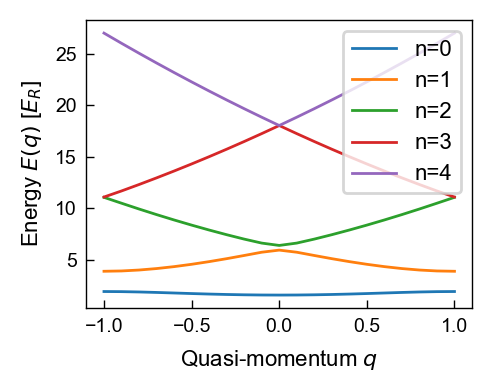

In [12]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Quasi-momentum $q$'
ylabel = r'Energy $E(q)$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

q_max = 1
q_num = 21
q = np.linspace(-q_max, q_max, q_num)

band_structure = np.zeros((Lat.N, q_num), dtype=float)

band_structure = np.array([Lat.calculate_En(qi) for qi in q])
band_structure = band_structure.T

n = 0
while n < 5:
    ax.plot(q, band_structure[n], label=f"n={n}")
    n += 1

ax.legend()

fig.tight_layout()
plt.show()

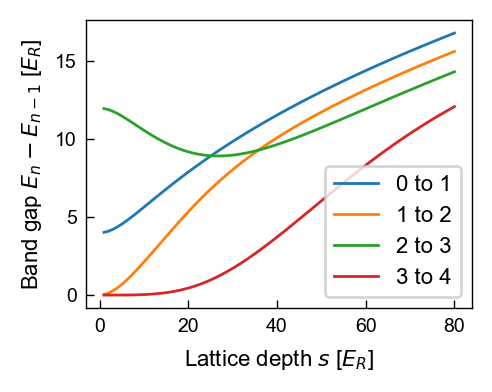

In [ ]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_{n-1}$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2, 3, 4]
band_gaps = np.array([[Lattice(s).band_gap(n-1, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"{n-1} to {n}")
ax.legend()

fig.tight_layout()
plt.show()

### Plot E_1 - E_0 compared to E_2 - E_0

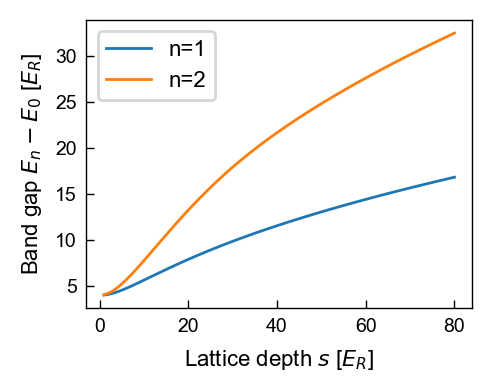

In [15]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_0$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2]
band_gaps = np.array([[Lattice(s).band_gap(0, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"n={n}")
ax.legend()

fig.tight_layout()
plt.show()